In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import kdeplot
import matplotlib.pyplot as plt
from utils import *
from pandas.api.types import CategoricalDtype
%load_ext autoreload

%autoreload 2

In [2]:
df = loadData()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [3]:
qqdf,ppc = qualtoquan(df)
qqdf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


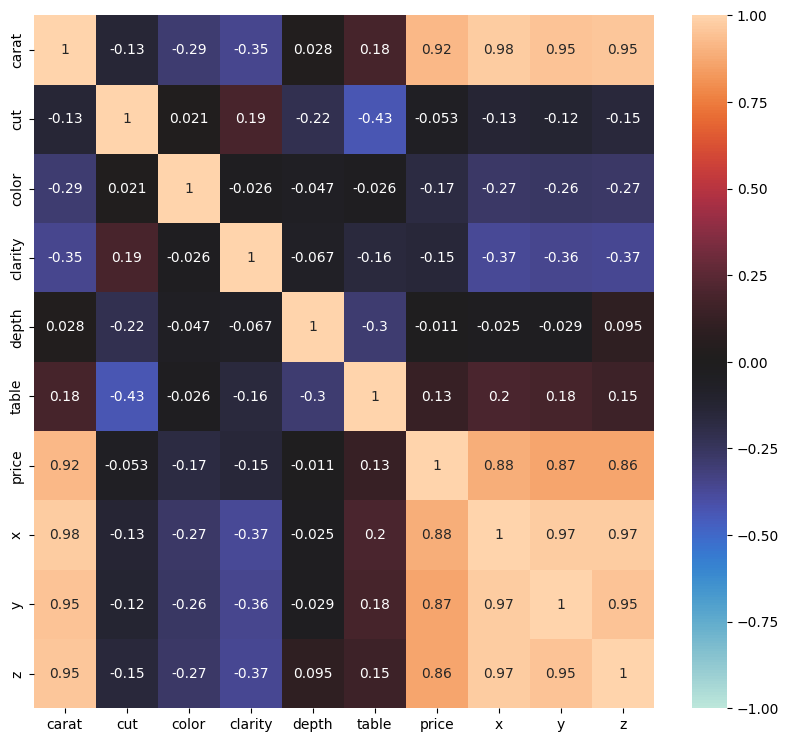

In [4]:
plt.figure(figsize=(10,9))
corrHeatmap = sns.heatmap(qqdf.corr(),vmin=-1,vmax=1,center=0,annot=True)

In [5]:
qqdf.corr()['price'].to_csv("../Figures/Question-1/price_corr_table.csv")
print(qqdf.corr()['price'])

carat      0.921591
cut       -0.053493
color     -0.172509
clarity   -0.146802
depth     -0.010648
table      0.127134
price      1.000000
x          0.884436
y          0.865422
z          0.861250
Name: price, dtype: float64


In [6]:
ppc.corr()['ppc'].to_csv("../Figures/Question-1/ppc_corr_table.csv")
print(ppc.corr()['ppc'])

ppc        1.000000
carat      0.769457
cut        0.005420
color     -0.011980
clarity    0.045125
depth     -0.035724
table      0.084585
price      0.912302
x          0.787346
y          0.771730
z          0.765542
Name: ppc, dtype: float64


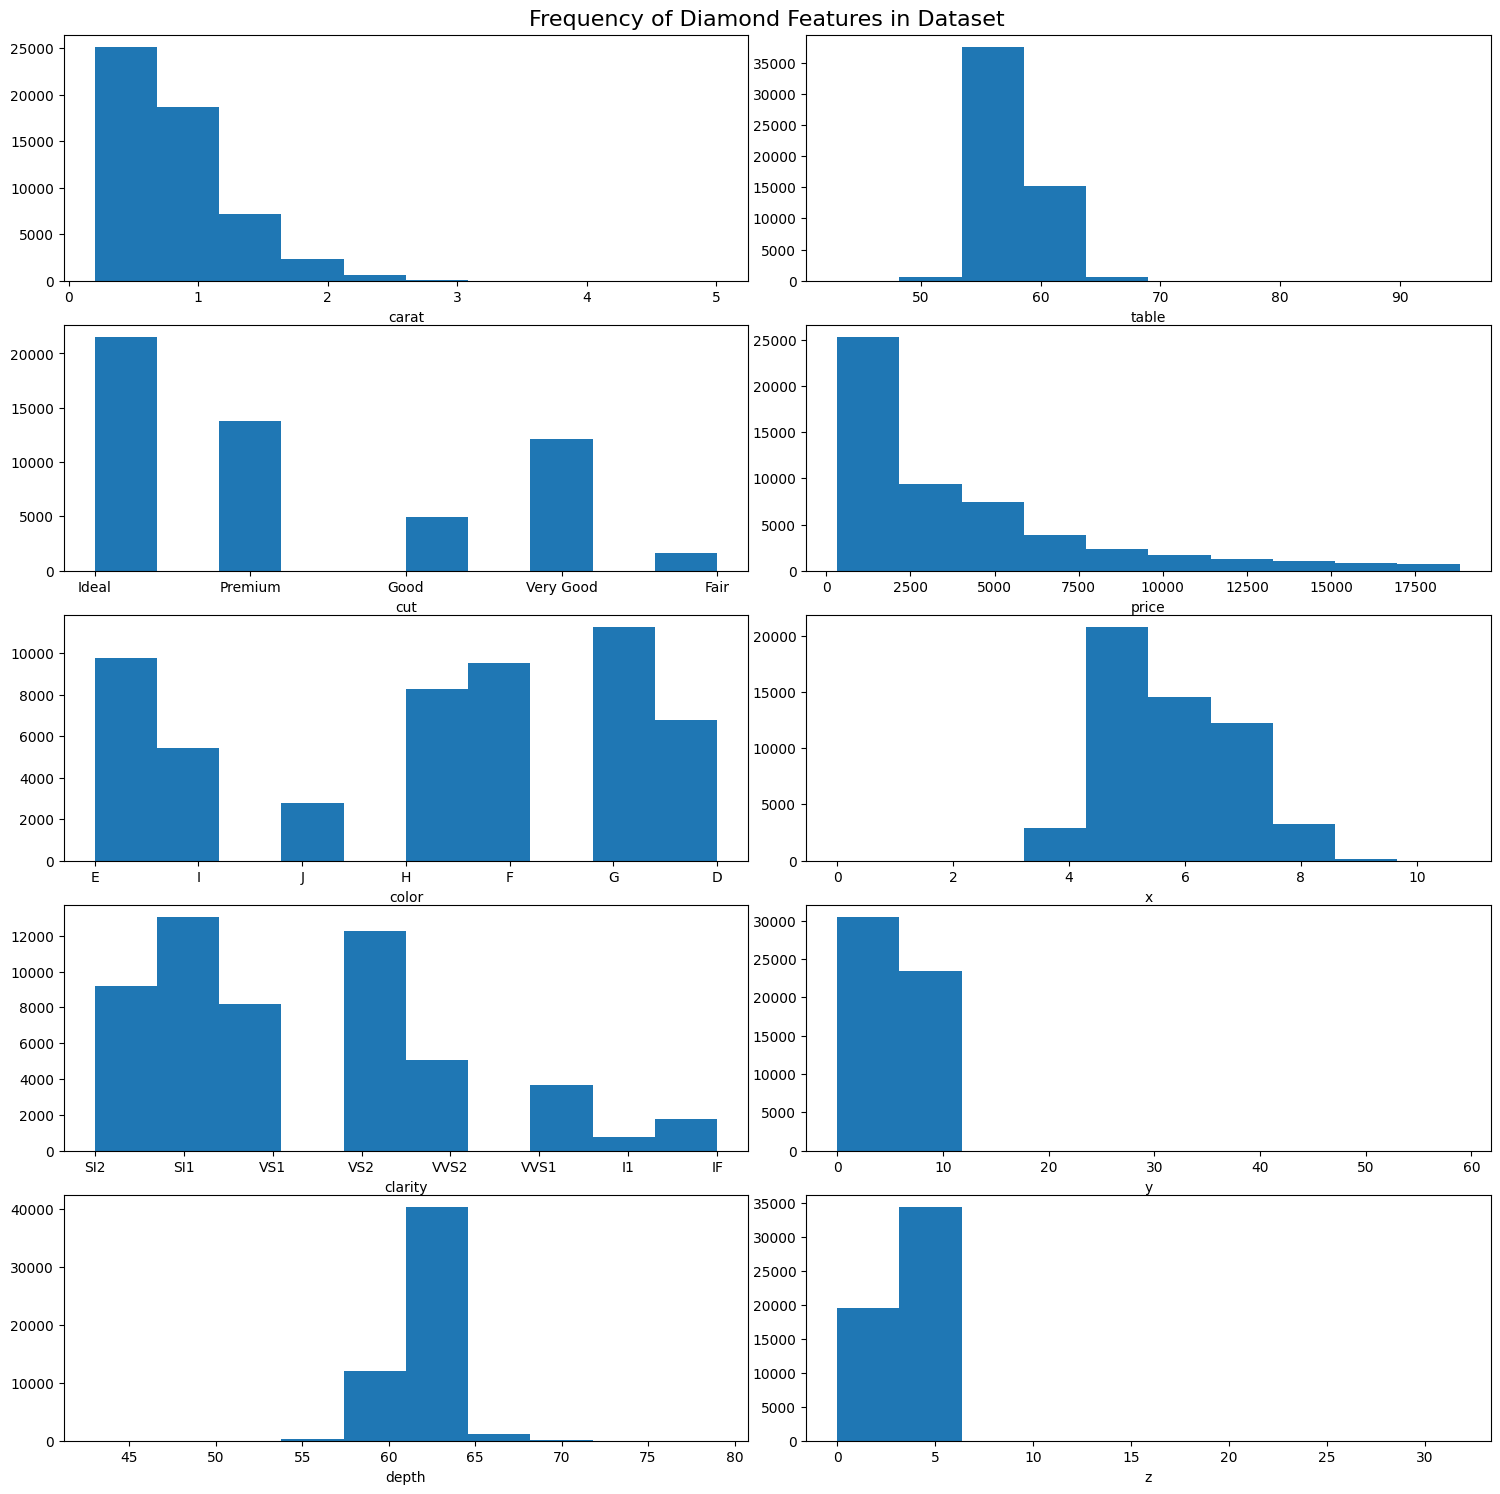

In [7]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    axs[i-numRows*j,j].hist(df[x])
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1

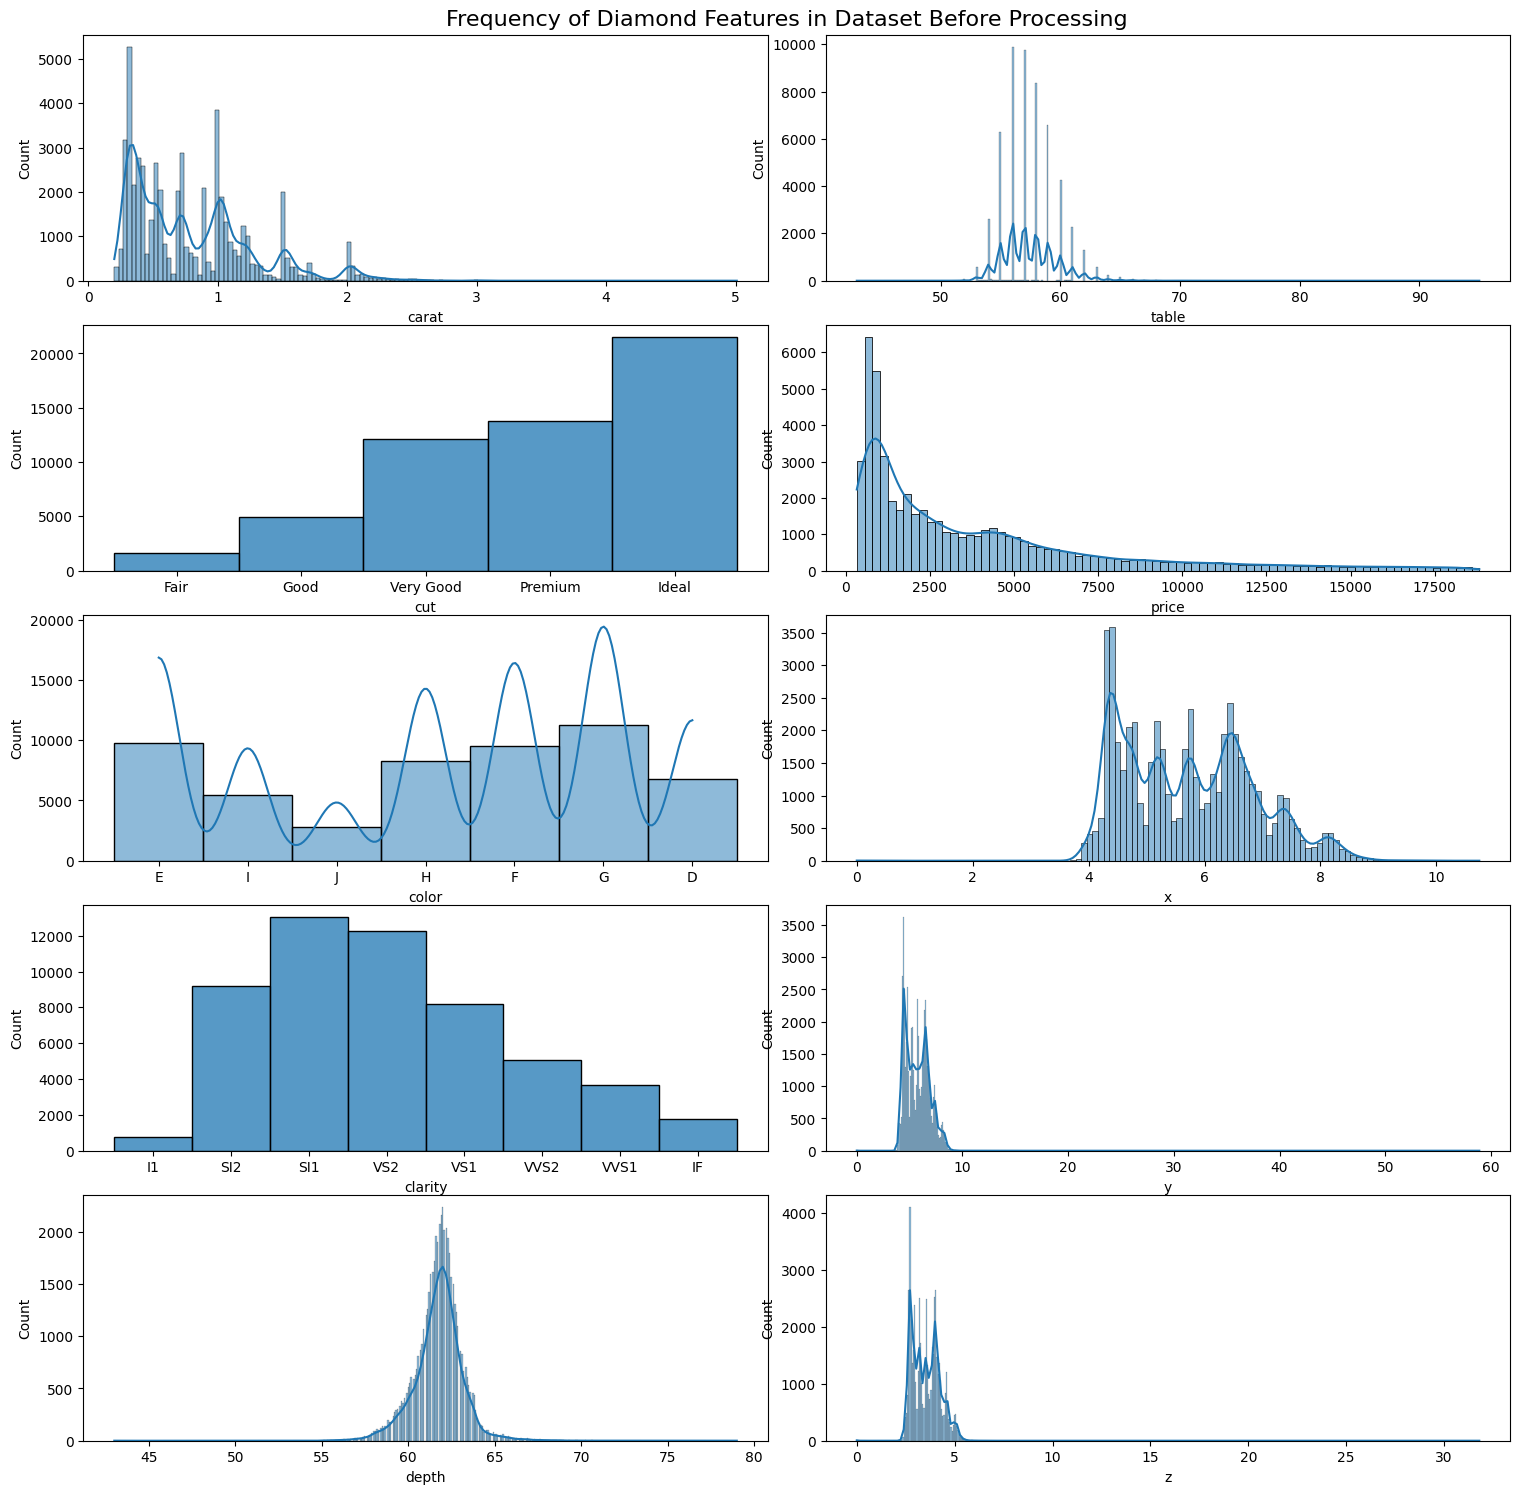

In [52]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset Before Processing",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    
    sns.histplot(data= df[x], ax=axs[i-numRows*j,j], \
                 kde= not pd.api.types.is_categorical_dtype(df[x]), \
                    )
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1
    

<Axes: title={'center': 'price'}, xlabel='clarity'>

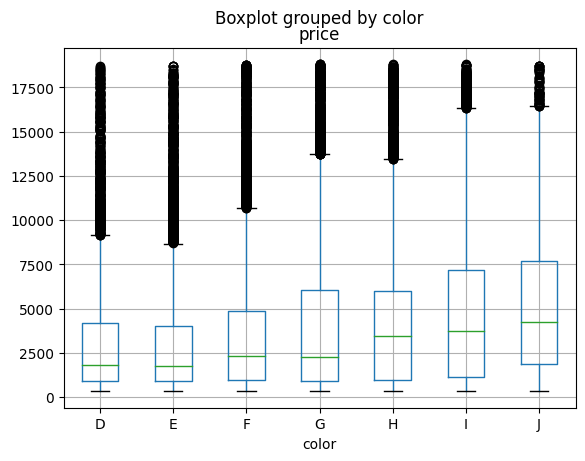

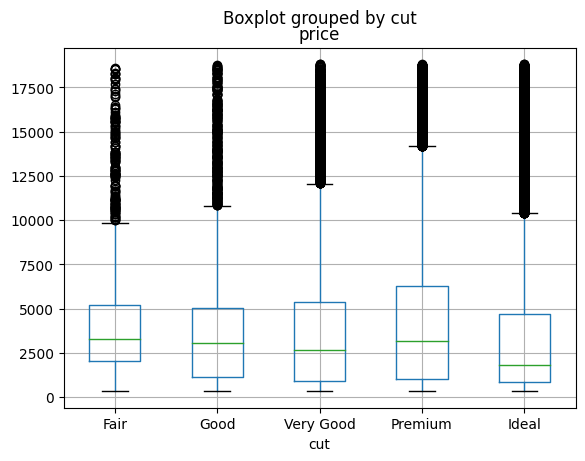

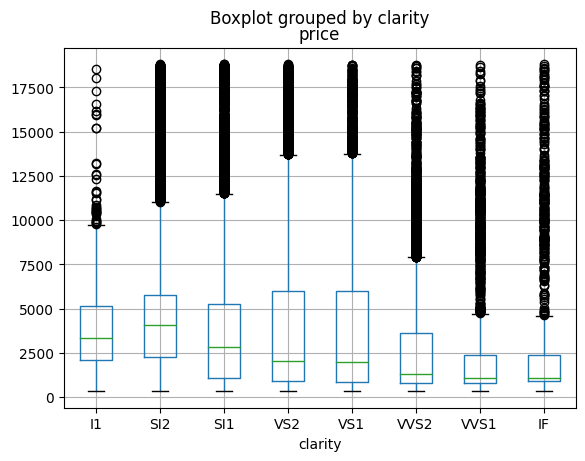

In [9]:
cutLabels = ["Fair","Good","Very Good", "Premium", "Ideal"]
clarityLabels = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.boxplot(column='price',by='color')
cutOrder = CategoricalDtype(cutLabels, ordered=True)
df['cut']=df['cut'].astype(cutOrder)
df.boxplot(column='price',by='cut')
clarityOrder = CategoricalDtype(clarityLabels, ordered=True)
df['clarity'] = df['clarity'].astype(clarityOrder)
df.boxplot(column='price',by='clarity')

In [10]:
for x in qqdf.columns:
    print(f"{x}: {qqdf[x].skew()}")


carat: 1.116645920812613
cut: -0.7171804565507098
color: -0.18936591070095682
clarity: 0.5514375416590613
depth: -0.08229402630189467
table: 0.7968958486695427
price: 1.6183882985932467
x: 0.3786763426463927
y: 2.4341667164885554
z: 1.5224225590685583


In [11]:
#carat, price, y, z need processing

In [17]:
from scipy import stats

In [31]:
B = pd.Series(stats.boxcox(qqdf['carat'])[0])

In [49]:
processedDF = qqdf.copy()
methods = ["Sqrt", "boxcox", "No Change", "log"]
for x in qqdf.columns:
    if (x == 'cut' or x == 'color' or x == 'clarity'):
        processedDF[x] = qqdf[x]
        print(f"{x}: Categorical")
        continue
    if (np.abs(qqdf[x].skew()) < 0.5):
        print(f"{x}: No Change")
        continue
    logN = np.log(qqdf[x])
    sqrtN = np.sqrt(qqdf[x])
    boxcoxN = pd.Series(stats.boxcox(qqdf['carat'])[0])
    Ns = [sqrtN, boxcoxN, qqdf['x'], logN ]
    Skews = [sqrtN.skew(), boxcoxN.skew(),qqdf[x].skew(),logN.skew()]
    bestSkew = min(Skews)
    bestMethod = Skews.index(bestSkew)
    processedDF[x] = Ns[bestMethod]
    print(f"{x}: {bestSkew}: {methods[bestMethod]}")
processedDF['price'] = qqdf['price']

carat: 0.020450070764268666: boxcox
cut: Categorical
color: Categorical
clarity: Categorical
depth: No Change
table: 0.020450070764268666: boxcox
price: 0.020450070764268666: boxcox
x: No Change
y: 0.020450070764268666: boxcox
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


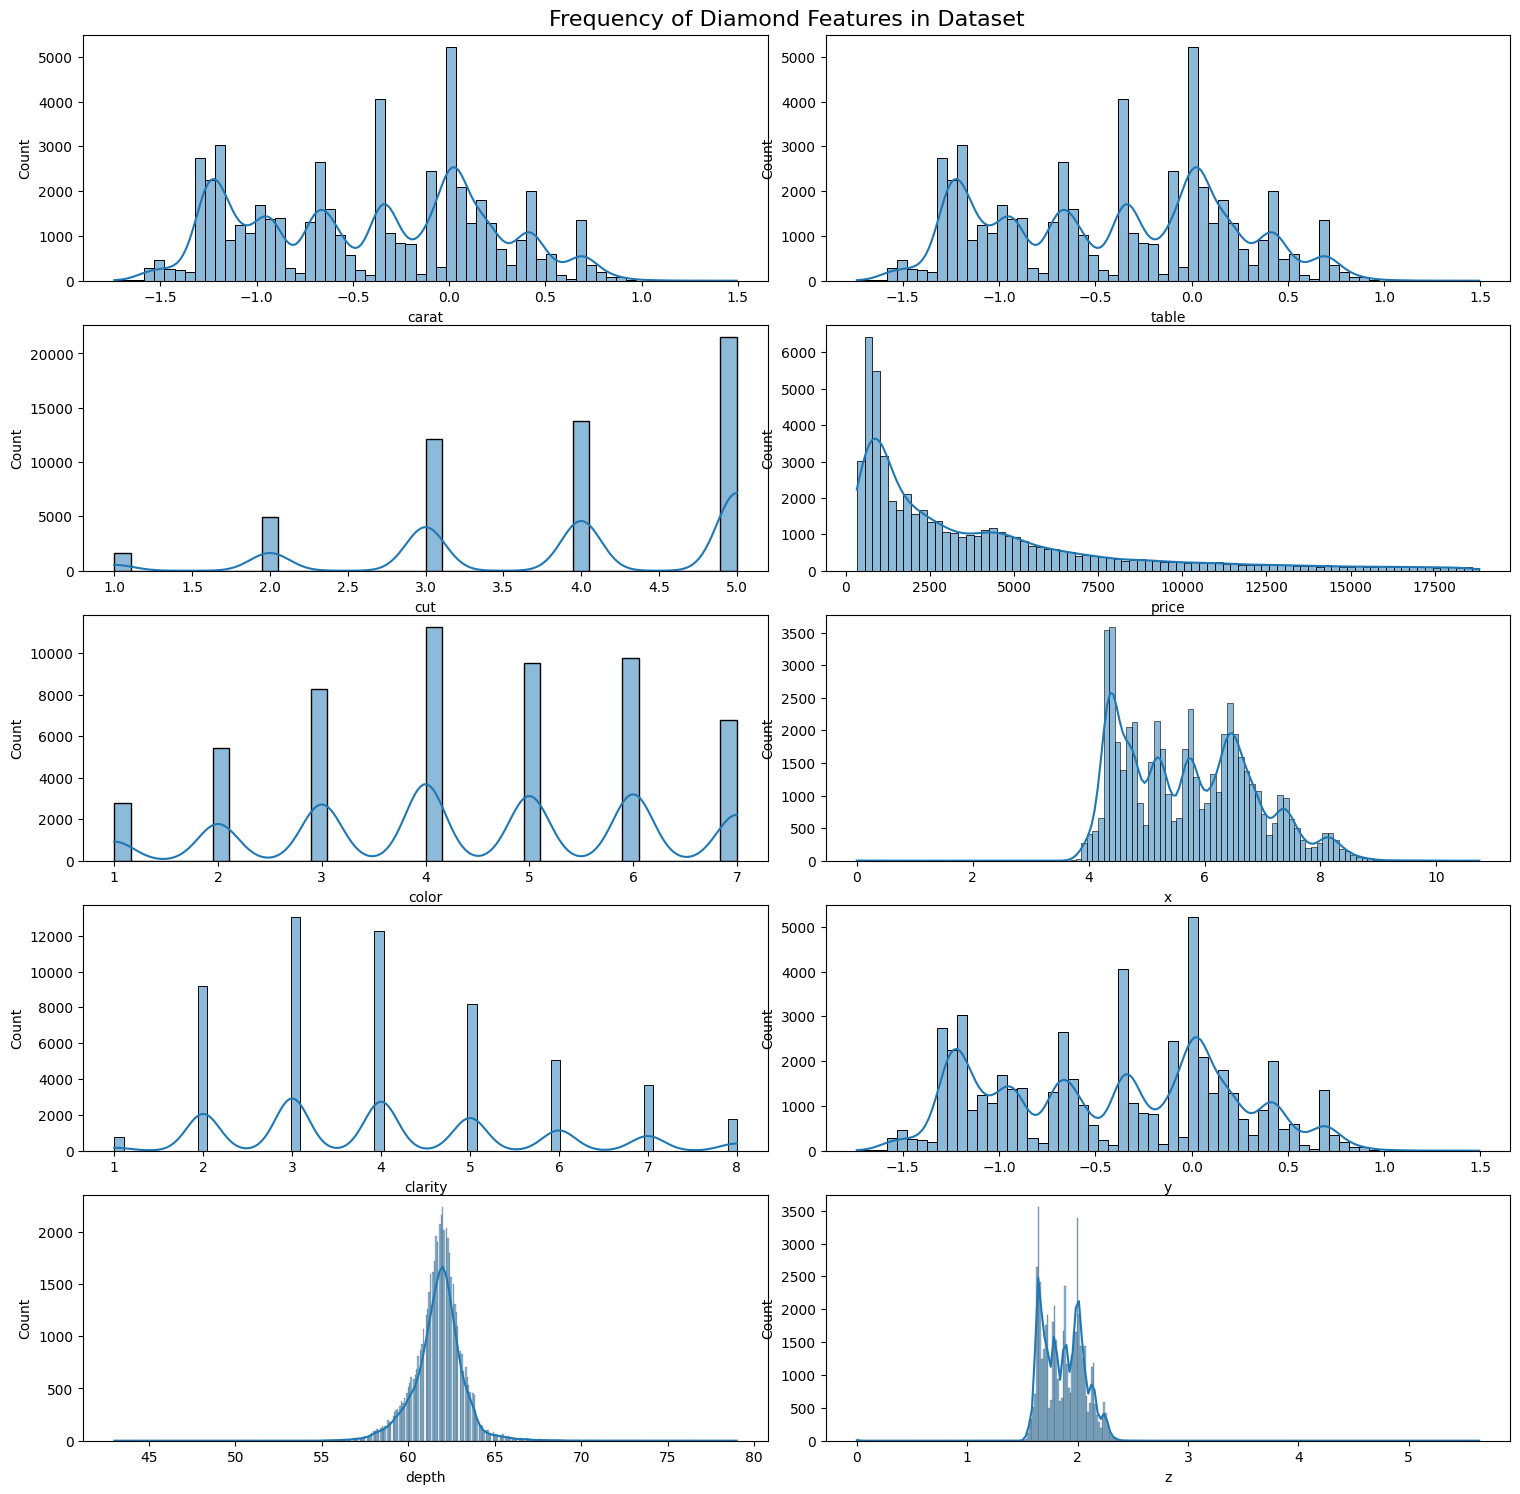

In [51]:
numRows = len(processedDF.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset After Processing",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    
    sns.histplot(data= processedDF[x], ax=axs[i-numRows*j,j], \
                 kde= not pd.api.types.is_categorical_dtype(processedDF[x]), \
                    )
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1
    

<Axes: xlabel='y', ylabel='Count'>

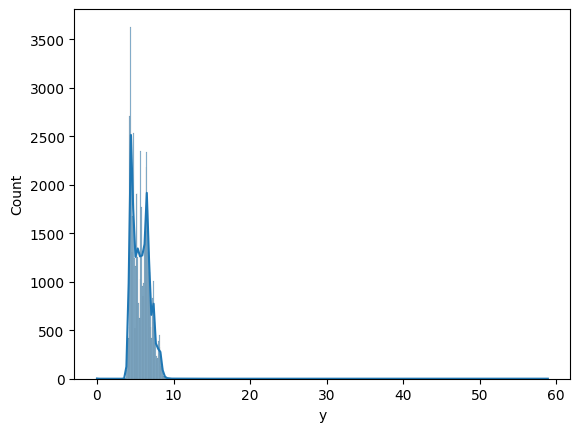

In [13]:
sns.histplot(qqdf['y'],kde=True)

/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan


<Axes: xlabel='y', ylabel='Count'>

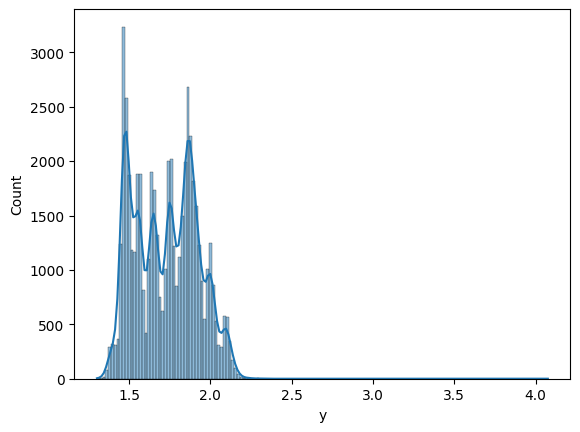

In [14]:
caratlog = np.log(qqdf['y'])
print(caratlog.skew())
sns.histplot(caratlog, kde=True)

In [15]:
caratlog

0        1.381282
1        1.345472
2        1.403643
3        1.442202
4        1.470176
           ...   
53935    1.750937
53936    1.749200
53937    1.736951
53938    1.811562
53939    1.769855
Name: y, Length: 53940, dtype: float64